In [ ]:
import numpy as np
import pandas as pd
import mglearn

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression,Ridge,Lasso, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

In [ ]:
data = pd.read_csv("var8V.csv", delimiter = ",")

names = data.columns
names = np.array(names)

data = np.array(data)
X = data[:,:-1]
y = data[:,-1]

X = MinMaxScaler().fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1488)
print("форма массива x_train: {}".format(X_train.shape))
print("форма массива y_train: {}".format(y_train.shape))
print("форма массива x_test: {}".format(X_test.shape))
print("форма массива y_test: {}".format(y_test.shape))

форма массива x_train: (112, 12)
форма массива y_train: (112,)
форма массива x_test: (38, 12)
форма массива y_test: (38,)


In [ ]:
import pandas as pd
from pandas import plotting
%matplotlib inline
data_dataframe = pd.DataFrame(X, columns = names[:-1])
grr = plotting.scatter_matrix(data_dataframe, c = y, figsize = (15, 15), marker = '0', hist_kwds = {'bins': 20}, s = 45, alpha = .9)

In [ ]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.score(X_test, y_test)

g:\igri\python368\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.34210526315789475

Модель -  KNeighborsClassifier(n_neighbors=19)
Точность на обучающем наборе: 0.46
Точность на тестовом наборе: 0.34


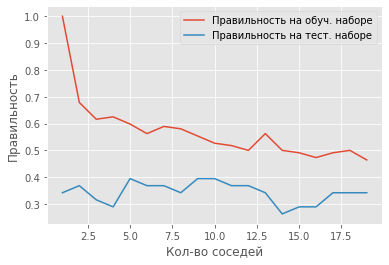

In [ ]:
#
# Прогнать ещё раз после фильтра признаков
#

#------------------------- Объявление параметров
train_acc = []
test_acc = []
settings = range(1,20)

#-------------------------- Обучение
for parametr in settings :
    model = KNeighborsClassifier(n_neighbors = parametr).fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train)) 
    test_acc.append(model.score(X_test, y_test)) 
        
#-------------------------- Рисование графика и вывод результатов
plt.plot(settings, train_acc, label = "Правильность на обуч. наборе")
plt.plot(settings, test_acc, label = "Правильность на тест. наборе")
plt.ylabel("Правильность")
plt.xlabel("Кол-во соседей")
plt.legend()
print("Модель - ",model)
print("Точность на обучающем наборе: {:.2f}".format(model.score(X_train, y_train)))
print("Точность на тестовом наборе: {:.2f}".format(model.score(X_test, y_test)))

In [ ]:
# 11111111111111111111111111
# 1Логистическая регрессиия1
# 11111111111111111111111111
# Можно не прогонять после фильтра
from sklearn.linear_model import LogisticRegression
C1 = list()
acc1 = list()
for k in [10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]:
    model = LogisticRegression( penalty="l1", C=k, solver = "liblinear")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #print("Точность на тестовой выборке: при C=", k, np.round(100*model.score(X_test, y_test), 1), "%")
    C1.append(k)
    acc1.append(np.round(100*model.score(X_test, y_test), 1))

plt.plot(C1, acc1)
plt.xscale('log')
plt.title("Точность LogReg при L1 регуляризации")
plt.xlabel("Коэф. регуляризации")
plt.ylabel("Точность")
plt.show()

print("\n")
C2 = list()
acc2 = list()
for k in [10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]:
    model = LogisticRegression( penalty="l2", C=k, solver = "liblinear")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #print("Точность на тестовой выборке: при C=", k, np.round(100*model.score(X_test, y_test), 1), "%")
    C2.append(k)
    acc2.append(np.round(100*model.score(X_test, y_test), 1))



plt.plot(C2, acc2)
plt.xscale('log')
plt.title("Точность LogReg при L2 регуляризации")
plt.xlabel("Коэф. регуляризации")
plt.ylabel("Точность")
plt.show()

In [ ]:
# 22222222222222
# 2Линейная свс2
# 22222222222222
C1 = list()
acc1 = list()
for k in [10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]:
    model = LinearSVC("l1", loss='squared_hinge', C=k, dual = False)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #print("Точность на тестовой выборке: при C=", k, np.round(100*model.score(X_test, y_test), 1), "%")
    C1.append(k)
    acc1.append(np.round(100*model.score(X_test, y_test), 1))

plt.plot(C1, acc1, color = 'blue')
plt.xscale('log')
plt.title("Точность SVC при L1 регуляризации")
plt.xlabel("Коэф. регуляризации")
plt.ylabel("Точность")
plt.show()

print("\n")
C2 = list()
acc2 = list()
for k in [10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]:
    model = LinearSVC("l2", loss='squared_hinge', C=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #print("Точность на тестовой выборке: при C=", k, np.round(100*model.score(X_test, y_test), 1), "%")
    C2.append(k)
    acc2.append(np.round(100*model.score(X_test, y_test), 1))

plt.plot(C2, acc2, color = 'blue')
plt.xscale('log')
plt.title("Точность SVC при L2 регуляризации")
plt.xlabel("Коэф. регуляризации")
plt.ylabel("Точность")
plt.show()

Модель -  RandomForestClassifier(max_depth=14, min_samples_leaf=5, random_state=1)
Точность на обучающем наборе: 0.90
Точность на тестовом наборе: 0.58


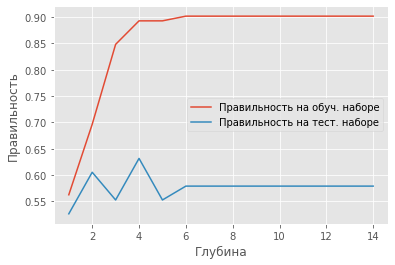

In [ ]:
#
# Прогнать ещё раз после фильтра признаков
#

#------------------------- Объявление параметров
train_acc = []
test_acc = []
settings = range(1,15)

#-------------------------- Обучение
for parametr in settings :
    model = RandomForestClassifier(max_depth = parametr, random_state = 1).fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train)) 
    test_acc.append(model.score(X_test, y_test)) 
        
#-------------------------- Рисование графика и вывод результатов
plt.plot(settings, train_acc, label = "Правильность на обуч. наборе")
plt.plot(settings, test_acc, label = "Правильность на тест. наборе")
plt.ylabel("Правильность")
plt.xlabel("Глубина")
plt.legend()
print("Модель - ",model)
print("Точность на обучающем наборе: {:.2f}".format(model.score(X_train, y_train)))
print("Точность на тестовом наборе: {:.2f}".format(model.score(X_test, y_test)))

Модель -  RandomForestClassifier(max_depth=3, min_samples_split=10, n_estimators=199,
                       random_state=2)
Точность на обучающем наборе: 0.84
Точность на тестовом наборе: 0.58


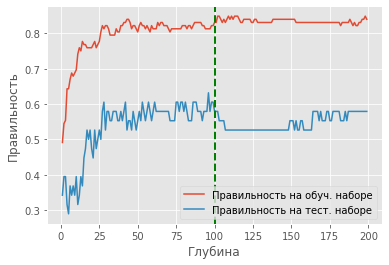

In [ ]:
#
# Прогнать ещё раз после фильтра признаков
#

#------------------------- Объявление параметров
train_acc = []
test_acc = []
settings = range(1,200)

#-------------------------- Обучение
for parametr in settings :
    model = RandomForestClassifier(max_depth = 3, random_state = 2, n_estimators = parametr, min_samples_split = 10).fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train)) 
    test_acc.append(model.score(X_test, y_test)) 
        
#-------------------------- Рисование графика и вывод результатов
plt.plot(settings, train_acc, label = "Правильность на обуч. наборе")
plt.plot(settings, test_acc, label = "Правильность на тест. наборе")
plt.axvline(linewidth=2, color='green', linestyle = '--', x=100, ymin=0, ymax=1)
plt.ylabel("Правильность")
plt.xlabel("Глубина")
plt.legend()
print("Модель - ",model)
print("Точность на обучающем наборе: {:.2f}".format(model.score(X_train, y_train)))
print("Точность на тестовом наборе: {:.2f}".format(model.score(X_test, y_test)))

In [ ]:
#
# Прогнать ещё раз после фильтра признаков
#

#------------------------- Объявление параметров
train_acc = []
test_acc = []
settings = range(1,5)

#-------------------------- Обучение
for parametr in settings :
    model = GradientBoostingClassifier(max_depth = parametr, random_state = 42, learning_rate = 0.1, max_leaf_nodes = 30, n_estimators = 75).fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train)) 
    test_acc.append(model.score(X_test, y_test)) 
        
#-------------------------- Рисование графика и вывод результатов
plt.plot(settings, train_acc, label = "Правильность на обуч. наборе")
plt.plot(settings, test_acc, label = "Правильность на тест. наборе")
plt.ylabel("Правильность")
plt.xlabel("Глубина")
plt.legend()
print("Модель - ",model)
print("Точность на обучающем наборе: {:.2f}".format(model.score(X_train, y_train)))
print("Точность на тестовом наборе: {:.2f}".format(model.score(X_test, y_test)))

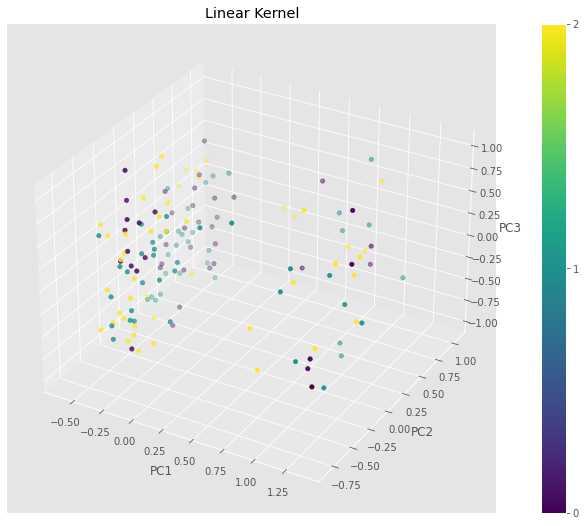

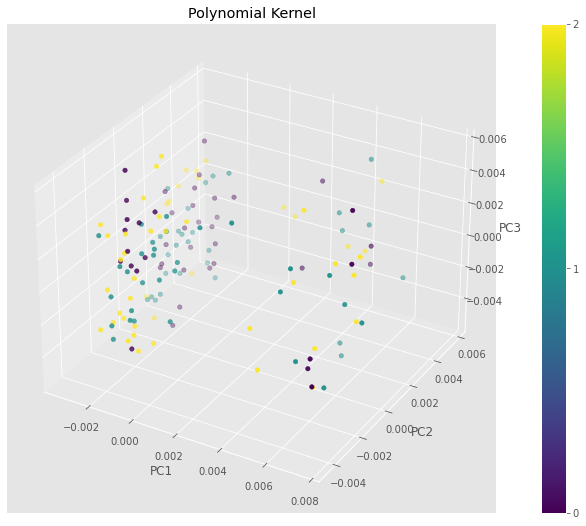

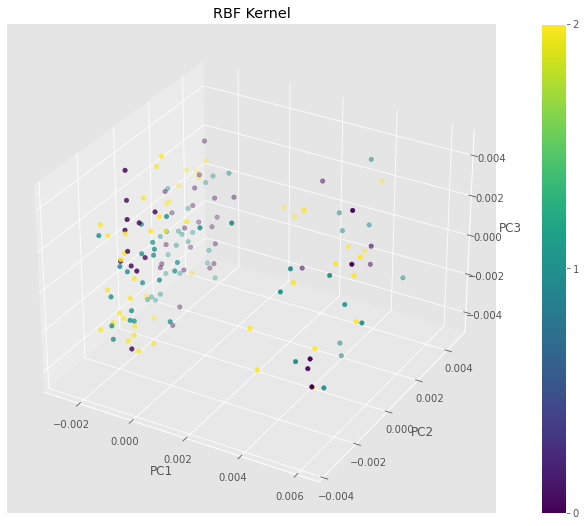

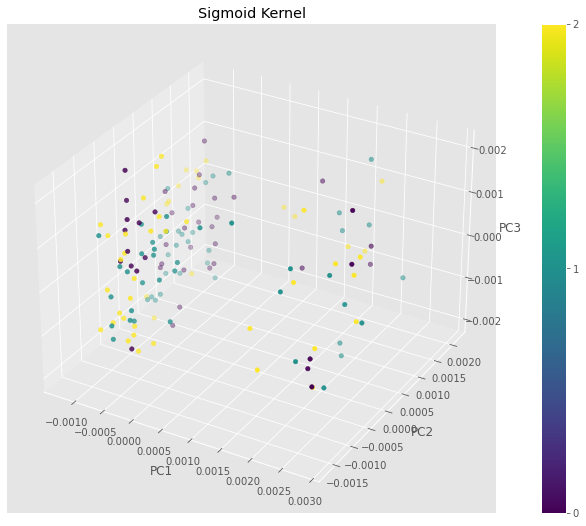

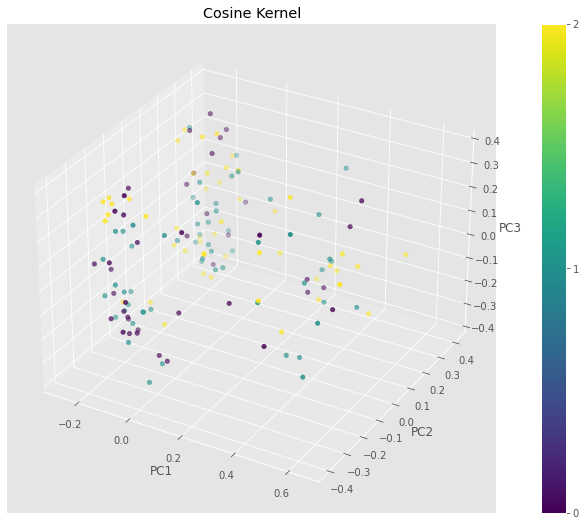

In [ ]:
from sklearn.decomposition import KernelPCA
 
names = [
         'Linear Kernel',
         'Polynomial Kernel',
         'RBF Kernel',
         'Sigmoid Kernel',
         'Cosine Kernel'
         ]
 
classifiers = [
    KernelPCA(n_components = 3, kernel = 'linear'),
    KernelPCA(n_components = 3, kernel = 'poly', gamma= 0.00001),
    KernelPCA(n_components = 3, kernel = 'rbf', gamma= 0.00001),
    KernelPCA(n_components = 3, kernel = 'sigmoid', gamma= 0.00001),
    KernelPCA(n_components = 3, kernel = 'cosine')
]
 
models=zip(names,classifiers)
   
for name, kpca in models:
    X_PCA = kpca.fit_transform(X)
    
    from mpl_toolkits.mplot3d import axes3d
    from matplotlib import style
    style.use('ggplot')
    
    fig = plt.figure(figsize=(16,9))
    ax1 = fig.add_subplot(111, projection='3d')
    loc = [1,2,3]
    classes = ['0','1','2']
    x3d = X_PCA[:,0]
    y3d = X_PCA[:,1]
    z3d = X_PCA[:,2]
 
    plot = ax1.scatter(x3d, y3d, z3d, c=y, cmap="viridis")
    ax1.set_xlabel('PC1')
    ax1.set_ylabel('PC2')
    ax1.set_zlabel('PC3')
    cb = plt.colorbar(plot)
    cb.set_ticks(loc)
    cb.set_ticklabels(classes)
 
    plt.title(name)
    plt.show()

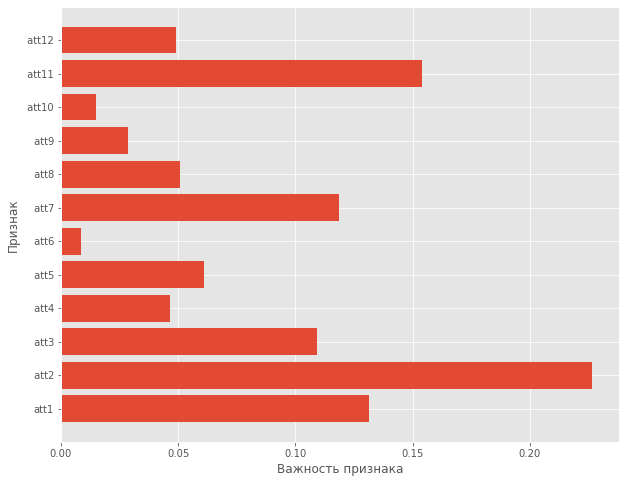

In [ ]:
AllModels = (RandomForestClassifier(max_depth=4, random_state = 2)) 

fig, axes = plt.subplots(1, 1, figsize=(10, 8))

def plot_feature_importances_cancer(Model, ax):
    n_features = X.shape[1]
    model = Model.fit(X_train, y_train)
    plt.barh(range(n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), names[:-1])
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")
    

plot_feature_importances_cancer(AllModels, axes)

In [ ]:
# Важность признаков случ. леса
Feat_Im, Feat_Ind = list(), list()

model = RandomForestClassifier(max_depth=4, random_state = 2).fit(X_train, y_train)

for i in range(X.shape[1]):
    if (model.feature_importances_[i] * 100) > 8:
        Feat_Ind.append(i)
        Feat_Im.append(model.feature_importances_[i])

print("Индексы массивов важнее 10% - ", Feat_Ind)        
print("Важности признаков - ", Feat_Im)

Индексы массивов важнее 10% -  [0, 1, 2, 6, 10]
Важности признаков -  [0.13151522576802535, 0.2267457632977237, 0.1093640979869864, 0.11855142706219736, 0.15424534943981824]


In [ ]:
#
# ФИЛЬТР ПРИЗНАКОВ
#
# Для улучшения результатов после прогона фильтра, прогнать ещё раз все классификаторы
#

DX = np.zeros((X.shape[0], len(Feat_Ind))) # Хардкод и дрысня

DX[:,0] = X[:,0]
DX[:,1] = X[:,1]
DX[:,2] = X[:,2]
DX[:,3] = X[:,6]
DX[:,4] = X[:,10]

X_train, X_test, y_train, y_test = train_test_split(DX, y, random_state=42)
print("форма массива x_train: {}".format(X_train.shape))
print("форма массива y_train: {}".format(y_train.shape))
print("форма массива x_test: {}".format(X_test.shape))
print("форма массива y_test: {}".format(y_test.shape))

форма массива x_train: (112, 5)
форма массива y_train: (112,)
форма массива x_test: (38, 5)
форма массива y_test: (38,)


In [ ]:
ResultsModel = (KNeighborsClassifier(n_neighbors = 100),
             RandomForestClassifier(max_depth=100), 
             DecisionTreeClassifier(max_depth=100), 
             GradientBoostingClassifier(max_depth = 10))

TabData = {'Модель': ResultsModel,
           #'Точность на обучении':ResultsTrain,
           'Точность на тесте':ResultsTest,
           #'Лучшая точность на обучении': BestResultsTrain,
           #'При глубине обучения':BestTrainParamResult,
           'Лучшая точность на тесте':BestResultsTest,
           'При глубине теста':BestTestParamResult
           }

ResultTab = pd.DataFrame(TabData)
display(ResultTab)